# Classifying cat and dog images using Convolutional Neural Networks

## Import the images

Download the images from source

In [1]:
!wget https://github.com/robitussin/tensorflow_lite_projects/blob/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip?raw=True

--2025-05-19 06:27:48--  https://github.com/robitussin/tensorflow_lite_projects/blob/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip?raw=True
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/robitussin/tensorflow_lite_projects/raw/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip [following]
--2025-05-19 06:27:49--  https://github.com/robitussin/tensorflow_lite_projects/raw/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/robitussin/tensorflow_lite_projects/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zip [following]
--2025-05-19 06:27:49--  https://raw.githubusercontent.com/robitussin/tensorflow_lite_projects/9f28133e4e1a8c63ed5f1c754d8972c305500878/catsanddogs.zi

Unzip the downloaded zip file

In [2]:
!unzip catsanddogs.zip?raw=True

Archive:  catsanddogs.zip?raw=True
   creating: catsanddogs/
   creating: catsanddogs/test/
   creating: catsanddogs/train/
   creating: catsanddogs/validation/
   creating: catsanddogs/test/cat/
   creating: catsanddogs/test/dog/
   creating: catsanddogs/train/cat/
  inflating: catsanddogs/train/.DS_Store  
  inflating: __MACOSX/catsanddogs/train/._.DS_Store  
   creating: catsanddogs/train/dog/
   creating: catsanddogs/validation/cat/
  inflating: catsanddogs/validation/.DS_Store  
  inflating: __MACOSX/catsanddogs/validation/._.DS_Store  
   creating: catsanddogs/validation/dog/
  inflating: catsanddogs/test/cat/cat.198.jpg  
  inflating: __MACOSX/catsanddogs/test/cat/._cat.198.jpg  
  inflating: catsanddogs/test/cat/cat.167.jpg  
  inflating: __MACOSX/catsanddogs/test/cat/._cat.167.jpg  
  inflating: catsanddogs/test/cat/cat.173.jpg  
  inflating: __MACOSX/catsanddogs/test/cat/._cat.173.jpg  
  inflating: catsanddogs/test/cat/cat.172.jpg  
  inflating: __MACOSX/catsanddogs/test/cat

## Import the libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Hyperparameters: Set the image size and batch size

In [4]:
img_height, img_width = 32, 32
batch_size = 20

## Split the images into train, validation and test

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "catsanddogs/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "catsanddogs/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "catsanddogs/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 202 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


## Display sample images from the dataset

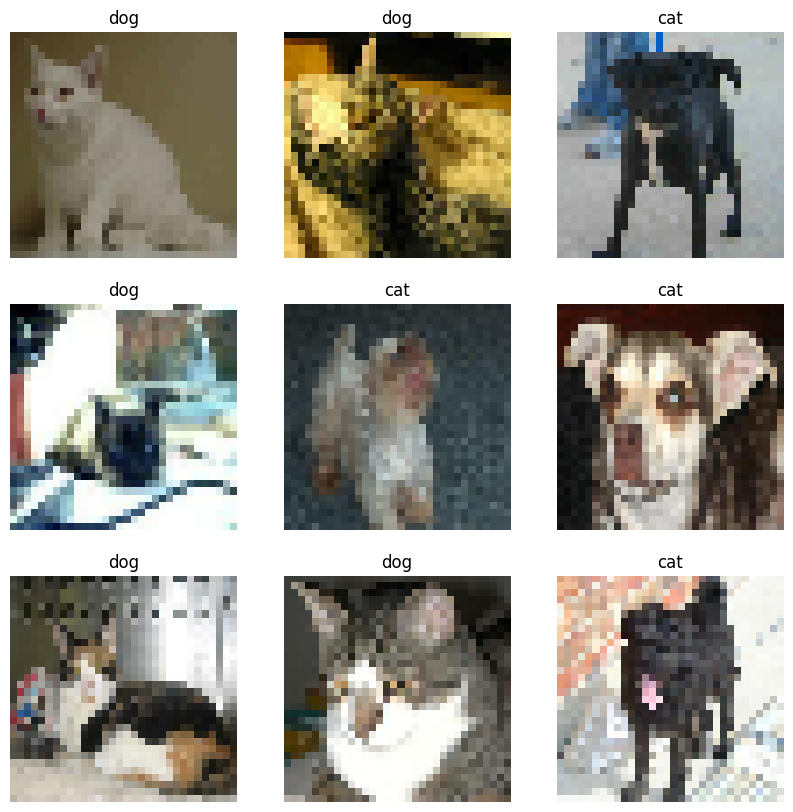

In [6]:
class_names = ["dog", "cat"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Create the Convolutional Neural Network Model (CNN)

In [7]:
model = tf.keras.Sequential()

In [8]:
model.add(tf.keras.layers.Rescaling(1./255))

In [9]:
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())

In [10]:
model.add(tf.keras.layers.Flatten())

In [11]:
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(3))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Define the optimizer and loss function

In [13]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

## Train the model

In [14]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - accuracy: 0.5260 - loss: 0.8996 - val_accuracy: 0.5000 - val_loss: 0.8188
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4654 - loss: 0.7930 - val_accuracy: 0.5100 - val_loss: 0.7054
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.4666 - loss: 0.7149 - val_accuracy: 0.4850 - val_loss: 0.6936
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4635 - loss: 0.7080 - val_accuracy: 0.5150 - val_loss: 0.6952
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5277 - loss: 0.6901 - val_accuracy: 0.4900 - val_loss: 0.6977
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5030 - loss: 0.7044 - val_accuracy: 0.4950 - val_loss: 0.6956
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5657 - loss: 0.6801 - val_accuracy: 0.5500 - val_loss: 0.6862
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6060 - loss: 0.6687 - val_accuracy: 0.5300 - 

## Test the model

In [15]:
model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5461 - loss: 0.6851


[0.686862587928772, 0.5350000262260437]

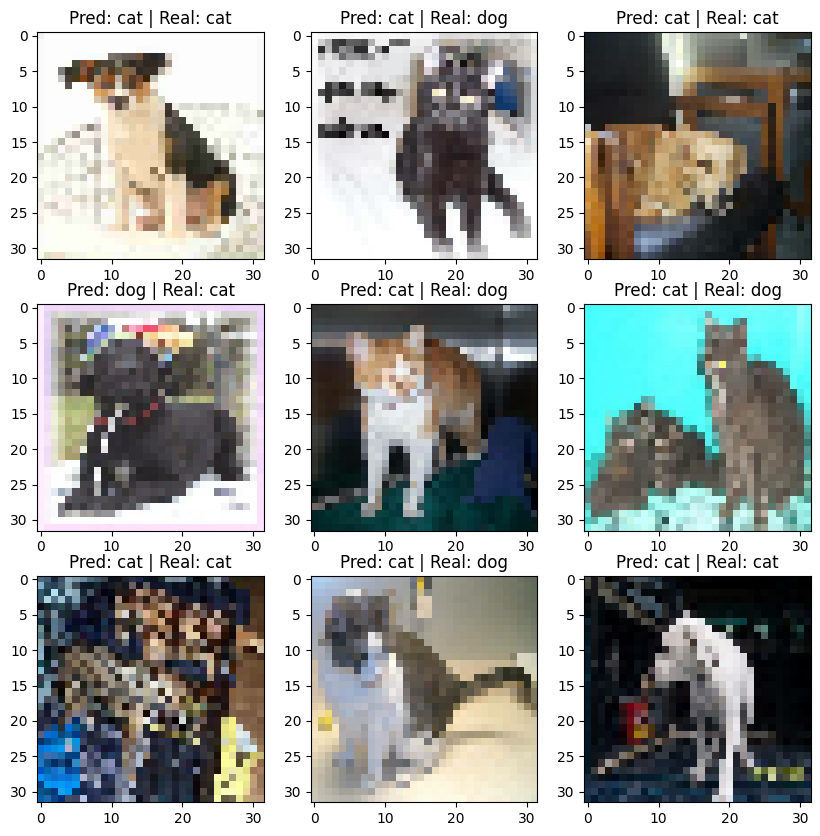

In [16]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

## Save the model

In [17]:
model.save('fruitmodel.keras')